# Machine Learning Ideas

### Aprendizaje supervisado

¿Qué es el aprendizaje supervisado? Consiste en obtener variables categóricas a partir de datos presentados en un contexto donde el objetivo es obtener una función de decisión, la cual sirve como límite para establecer las acciones correspondientes a tomar con una muestra específica de acuerdo a su **clase** correspondiente, siendo la **clase** la variable categórica que se quiere extraer o deducir a partir de su **variable de decisión**. 
Una forma de aplicar estos conceptos en un contexto de análisis para realizar una tarea de reconocimiento puede ser durante el reconocimiento de perros y gatos: las clases serán 'perro' y 'gato' y nuestras variables de decisión deberán respaldar nuestra hipótesis de que la forma de la nariz es la que nos permite distinguir fotográficamente entre un perro y un gato. Las variables de decisión deberán establecer un ajuste óptimo para separar perros y gatos de acuerdo a la forma de la nariz.
Cabe aclarar que en el aprendizaje supervisado la decisión esta influenciada por variables categóricas que también se ajustan a la decisión tomada, es decir que tenemos que entrenar un vector de categorías junto con nuestro vector de datos x que consistirá en los datos que utilizamos anteriormente para calcular la tendencia entre los datos.

### Supervisación y regiones factibles

Antes de adentrarnos sobre medidas conocidas para analizar resultados de problemas supervisados hace falta adentrarse un poco mas en lo que se conoce como **programación lineal. La programación lineal es un paradigma de programación que consiste en resolver inecuaciones (estos son problemas cuyas soluciones requieren de satisfacción de restricciones matemáticas para poder resolverse debido a que los problemas no se resolverán aplicando ecuaciones sobre el conjunto total de variables en un plano) para obtener regiones de viabilidad o regiones de factibilidad que establecen qué conjunto de variables resuelven una ecuación de forma válida.**
Las regiones factibles surgen del hallazgo de polihedros y márgenes de separación en una nube de puntos que se obtienen mediante la resolución de inecuaciones.
**No todos los problemas de programación lineal se pueden resolver en un tiempo razonable para nosotros, por lo que ese tipo de problemas permanecen en nuestra incógnita. Por suerte, varios problemas de aprendizaje supervisado contienen muy buenos algoritmos que nos permiten encontrar diversas soluciones para varios conjuntos de datos en un tiempo bastante corto.**

### Decisión y confusión

De las teorías de programación lineal surge un concepto necesario a aplicar en problemas de aprendizaje supervisado: el de los **límites de decisión**. Los límites de decisión se deducen a partir de la resolución del problema de regresión subyacente en un contexto de aprendizaje supervisado. Dichos límites estan ubicados en aquellos puntos en el plano donde la clasificación resulta ambigua y la resolución de la ecuación de regresión en esos puntos nos da un resultado que anula la posibilidad de obtener clases en esas partes, por lo que resultan ser límites entre una clase y la otra.
Esto acarrea un problema que se debe medir con cautela a la hora de encarar un proyecto de Machine Learning. Para medir el éxito operativo **hay varios métodos y varias fórmulas que buscan ajustar modelos de entrenamiento y de prueba a un punto donde las condiciones de análisis son óptimas**. En este curso nosotros vamos a ver las medidas de una **matriz de confusión**.

##### ¿Qué es una matriz de confusión?

    * Es una matriz que contiene información estadística acerca del acierto en la clasificación.
    * Los datos alojados en la matriz de confusión contienen en la diagonal la cantidad de variables original, mientras que las variables predecidas se leen a partir de las columnas de la matriz de confusión.
    * Se llama matriz de confusión porque nos permite obtener resultados sobre el éxito de nuestro modelo a partir del conocimiento sobre las muestras mal clasificadas.
    * Para ver una matriz de confusión solamente utilizamos como argumentos para el método confusion_matrix de scikit-learn los valores originales de y con los valores predecidos de y.
    * Luego visualizamos la matriz de confusión programando una función que permita intensificar con un color oscuro aquellos valores que aparecen predecidos demasiadas veces, esto nos da una mejor idea de cuál es la categoría a la que el modelo esta haciendo énfasis cuando el error es alto.

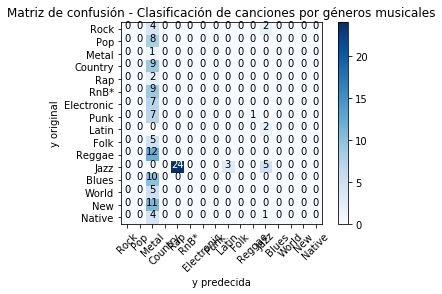

In [3]:
#nombres de nuestras variables categoricas

generos = ['Rock',
 'Pop',
 'Metal',
 'Country',
 'Rap',
 'RnB*',
 'Electronic',
 'Punk',
 'Latin',
 'Folk',
 'Reggae',
 'Jazz',
 'Blues',
 'World',
 'New',
 'Native']

# variables categóricas expresadas en números
y = [14,  1,  9, 15, 10, 15,  6, 14,  3,  1, 14,  5,  5,  3, 13, 10,  3,
        1,  3,  0, 10,  7, 12, 12,  5, 14,  2,  7, 12, 10,  4,  3,  9, 14,
       14,  5,  1, 14,  7, 14, 12, 14,  0, 12,  8,  7,  0, 14, 11, 11, 11,
       11, 11, 11, 11, 11, 11, 11, 11, 11, 13, 11,  6, 11, 12, 13,  1, 11,
       11,  6, 11,  0, 11, 10, 11, 11, 11, 11, 15,  9,  9, 11, 11, 11, 11,
        5, 15, 11,  0,  7, 14,  5,  7, 10, 12, 12, 13,  3, 10, 10,  7,  9,
        5, 10,  4, 13,  7,  5,  1,  6,  0,  8, 10,  6, 11, 11, 11, 10,  5,
        3, 12,  6,  1,  3,  6, 10,  3, 12,  1, 15, 11, 11]

#variables predecidas por un algoritmo de aprendizaje supervisado
p = [ 2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2, 10,  2,  2,  2,  2,  2, 11,  2, 11,  2,  4,  4,  4,
        4, 11,  8,  4,  8,  8,  4,  4,  4,  2,  4,  2,  4,  2,  2,  2,  4,
        4,  2,  4, 11,  4,  2, 11,  4,  4,  4,  2,  2,  2, 11,  4,  4,  4,
        2,  2,  4,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2, 11,  2,  2, 11, 11,  4,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2, 11,  4,  4]

import numpy as np
from itertools import product
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, classes,
                          title='Matriz de confusión - Clasificación de canciones por géneros musicales',
                          cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('y original')
    plt.xlabel('y predecida')    
    plt.show()

from sklearn.metrics import confusion_matrix

cf = confusion_matrix(y, p)
plot_confusion_matrix(cf,generos)


**La matriz de confusión nos permite hacer lo que se conoce como contraste de hipótesis; esto es, verificar si podemos efectivamente utilizar las variables predecidas de y o aún debemos entrenar el modelo con mejor información para superar los resultados de y original**.
Para realizar nuestro contraste de hipótesis tendremos que calcular información que se puede obtener de la matriz de confusión. Esta información esta compuesta por:
    * Los falsos positivos
    * Los falsos negativos
    * Los verdaderos positivos
    * Los verdaderos negativos
    * El porcentaje de acierto 
    * La reminiscencia
    * La especificidad
    * La precisión
    * La media harmónica
    
#### ¿Qué son los falsos positivos?
    
    Los falsos positivos (también llamados errores de tipo I o errores de tipo alfa) son muestras cuyas variables categóricas positivas predecidas son falsas, es decir que se le asignan variables categóricas positivas a muestras que deberían tener variables categóricas negativas. Para obtener los falsos positivos simplemente hay que obtener el total de variables por cada fila y substraer las variables de y originales (las cuales se encuentran obteniendo la diagonal de la matriz).

In [4]:
TP = np.diag(cf)

FP = cf.sum(axis=0) - TP

for i in range(len(generos)):
    print("Falsos positivos en el reconocimiento de canciones de ", generos[i], ' es ', FP[i])

Falsos positivos en el reconocimiento de canciones de  Rock  es  0
Falsos positivos en el reconocimiento de canciones de  Pop  es  0
Falsos positivos en el reconocimiento de canciones de  Metal  es  93
Falsos positivos en el reconocimiento de canciones de  Country  es  0
Falsos positivos en el reconocimiento de canciones de  Rap  es  24
Falsos positivos en el reconocimiento de canciones de  RnB*  es  0
Falsos positivos en el reconocimiento de canciones de  Electronic  es  0
Falsos positivos en el reconocimiento de canciones de  Punk  es  0
Falsos positivos en el reconocimiento de canciones de  Latin  es  3
Falsos positivos en el reconocimiento de canciones de  Folk  es  0
Falsos positivos en el reconocimiento de canciones de  Reggae  es  1
Falsos positivos en el reconocimiento de canciones de  Jazz  es  5
Falsos positivos en el reconocimiento de canciones de  Blues  es  0
Falsos positivos en el reconocimiento de canciones de  World  es  0
Falsos positivos en el reconocimiento de cancio

#### ¿Qué son los falsos negativos?
    
    Los falsos positivos (también llamados errores de tipo II o errores de tipo beta) son muestras cuya variables categóricas negativas predecidas son falsas, es decir que se le asignan variables categóricas negativas a muestras que no lo son. Para obtener los falsos negativos simplemente hay que obtener el total de variables por cada columna y substraer las variables de y originales (las cuales se encuentran obteniendo la diagonal de la matriz).

In [5]:
FN = cf.sum(axis=1) - TP

for i in range(len(generos)):
    print("Falsos negativos en el reconocimiento de canciones de ", generos[i], ' es ', FN[i])

Falsos negativos en el reconocimiento de canciones de  Rock  es  6
Falsos negativos en el reconocimiento de canciones de  Pop  es  8
Falsos negativos en el reconocimiento de canciones de  Metal  es  0
Falsos negativos en el reconocimiento de canciones de  Country  es  9
Falsos negativos en el reconocimiento de canciones de  Rap  es  2
Falsos negativos en el reconocimiento de canciones de  RnB*  es  9
Falsos negativos en el reconocimiento de canciones de  Electronic  es  7
Falsos negativos en el reconocimiento de canciones de  Punk  es  8
Falsos negativos en el reconocimiento de canciones de  Latin  es  2
Falsos negativos en el reconocimiento de canciones de  Folk  es  5
Falsos negativos en el reconocimiento de canciones de  Reggae  es  12
Falsos negativos en el reconocimiento de canciones de  Jazz  es  27
Falsos negativos en el reconocimiento de canciones de  Blues  es  10
Falsos negativos en el reconocimiento de canciones de  World  es  5
Falsos negativos en el reconocimiento de canci

#### ¿Qué son los verdaderos positivos?
    
    Los verdaderos positivos son muestras cuya categoría predecida se corresponde con la categoría original. Para obtener los verdaderos positivos dada una matriz de confusión simplemente hay que prestar atención a la diagonal de la matriz.

In [6]:
for i in range(len(generos)):
    print("Verdaderos positivos en el reconocimiento de canciones de ", generos[i], ' es ', TP[i])

Verdaderos positivos en el reconocimiento de canciones de  Rock  es  0
Verdaderos positivos en el reconocimiento de canciones de  Pop  es  0
Verdaderos positivos en el reconocimiento de canciones de  Metal  es  1
Verdaderos positivos en el reconocimiento de canciones de  Country  es  0
Verdaderos positivos en el reconocimiento de canciones de  Rap  es  0
Verdaderos positivos en el reconocimiento de canciones de  RnB*  es  0
Verdaderos positivos en el reconocimiento de canciones de  Electronic  es  0
Verdaderos positivos en el reconocimiento de canciones de  Punk  es  0
Verdaderos positivos en el reconocimiento de canciones de  Latin  es  0
Verdaderos positivos en el reconocimiento de canciones de  Folk  es  0
Verdaderos positivos en el reconocimiento de canciones de  Reggae  es  0
Verdaderos positivos en el reconocimiento de canciones de  Jazz  es  5
Verdaderos positivos en el reconocimiento de canciones de  Blues  es  0
Verdaderos positivos en el reconocimiento de canciones de  World 

#### ¿Qué son los verdaderos negativos?
    
    Los verdaderos negativos son muestras cuya categoría predecida se corresponde con la categoría original y  la categoría es negativa. Para obtener los verdaderos negativos dada una matriz de confusión hay que sumar, por un lado, todas las variables en la matriz de confusión, y luego se debe sustraer a ese total el resultado de la suma de los falsos negativos, falsos positivos y verdaderos positivos.

In [7]:
TN = cf.sum() - (FP + FN + TP) #verdadero negativo

for i in range(len(generos)):
    print("Verdaderos negativos en el reconocimiento de canciones de ", generos[i], ' es ', TN[i])

Verdaderos negativos en el reconocimiento de canciones de  Rock  es  126
Verdaderos negativos en el reconocimiento de canciones de  Pop  es  124
Verdaderos negativos en el reconocimiento de canciones de  Metal  es  38
Verdaderos negativos en el reconocimiento de canciones de  Country  es  123
Verdaderos negativos en el reconocimiento de canciones de  Rap  es  106
Verdaderos negativos en el reconocimiento de canciones de  RnB*  es  123
Verdaderos negativos en el reconocimiento de canciones de  Electronic  es  125
Verdaderos negativos en el reconocimiento de canciones de  Punk  es  124
Verdaderos negativos en el reconocimiento de canciones de  Latin  es  127
Verdaderos negativos en el reconocimiento de canciones de  Folk  es  127
Verdaderos negativos en el reconocimiento de canciones de  Reggae  es  119
Verdaderos negativos en el reconocimiento de canciones de  Jazz  es  95
Verdaderos negativos en el reconocimiento de canciones de  Blues  es  122
Verdaderos negativos en el reconocimiento

#### ¿Qué es el acierto o accuracy score?
    
    El porcentaje de acierto o accuracy score es un porcentaje que nos permite interpretar el error sistemático, también llamado sesgo estadístico durante el entrenamiento de los datos para poder categorizar todas las muestras. El acierto simplemente estará conformando por la relación entre las variables predecidas correctamente y la sumatoria de estas variables junto con las que no fueron predecidas correctamente.

In [8]:
acierto = (TP+TN)/(TP+FP+FN+TN) * 100

for i in range(len(generos)):
    print("Acierto en el reconocimiento de canciones de ", generos[i], ' es ', acierto[i])

Acierto en el reconocimiento de canciones de  Rock  es  95.4545454545
Acierto en el reconocimiento de canciones de  Pop  es  93.9393939394
Acierto en el reconocimiento de canciones de  Metal  es  29.5454545455
Acierto en el reconocimiento de canciones de  Country  es  93.1818181818
Acierto en el reconocimiento de canciones de  Rap  es  80.303030303
Acierto en el reconocimiento de canciones de  RnB*  es  93.1818181818
Acierto en el reconocimiento de canciones de  Electronic  es  94.696969697
Acierto en el reconocimiento de canciones de  Punk  es  93.9393939394
Acierto en el reconocimiento de canciones de  Latin  es  96.2121212121
Acierto en el reconocimiento de canciones de  Folk  es  96.2121212121
Acierto en el reconocimiento de canciones de  Reggae  es  90.1515151515
Acierto en el reconocimiento de canciones de  Jazz  es  75.7575757576
Acierto en el reconocimiento de canciones de  Blues  es  92.4242424242
Acierto en el reconocimiento de canciones de  World  es  96.2121212121
Acierto e

Como se puede ver, el acierto en el reconocimiento parece ser bueno, por lo que hemos elegido buenas columnas de rasgos para poder reconocer los géneros musicales.
El único (y fuerte) sesgo que aparece es el de no identificar correctamente canciones de heavy metal. Si leemos un poco la información obtenida sobre los datos correctamente clasificados, veremos que varias canciones fueron identificadas como heavy metal cuando en realidad no lo son, lo cual es indicio de que es necesario contar con información recogida sobre mayores cantidades de canciones de heavy metal para eliminar el sesgo y obtener un porcentaje de acierto mayor en el reconocimiento de canciones de heavy metal.

### Sensibilidad/reminiscencia y especificidad
    
    Tanto la sensibilidad como la especificidad son las medidas que debemos utilizar cuando queremos medir la performance de nuestro modelo.
    La sensibilidad es el porcentaje de positivos correctamente identificados por nuestro modelo (esto es, el tamaño de verdaderos positivos sobre la suma de estos con el tamaño de falsos negativos). La sensibilidad (también llamada reminiscencia) junto con la medida de error que escogemos para validar nuestro análisis son dos medidas cruciales para decir que nuestro modelo entrena bien los datos.
    La especificidad es el porcentaje de negativos correctamente identificados por nuestro modelo (esto es, el tamaño de verdaderos negativos sobre la suma de estos con el tamaño de falsos positivos).    

In [9]:
# reminiscencia (tamaño de verdaderos positivos)
sensibilidad = TP/(TP+FN) * 100
# tamaño de verdaderos negativos
especificidad = TN/(TN+FP) * 100

for i in range(len(generos)):
    print("Sensibilidad en el reconocimiento de canciones de ", generos[i], ': ', sensibilidad[i])
    
for i in range(len(generos)):
    print("Especificidad en el reconocimiento de canciones de ", generos[i], ': ', especificidad[i])    

Sensibilidad en el reconocimiento de canciones de  Rock :  0.0
Sensibilidad en el reconocimiento de canciones de  Pop :  0.0
Sensibilidad en el reconocimiento de canciones de  Metal :  100.0
Sensibilidad en el reconocimiento de canciones de  Country :  0.0
Sensibilidad en el reconocimiento de canciones de  Rap :  0.0
Sensibilidad en el reconocimiento de canciones de  RnB* :  0.0
Sensibilidad en el reconocimiento de canciones de  Electronic :  0.0
Sensibilidad en el reconocimiento de canciones de  Punk :  0.0
Sensibilidad en el reconocimiento de canciones de  Latin :  0.0
Sensibilidad en el reconocimiento de canciones de  Folk :  0.0
Sensibilidad en el reconocimiento de canciones de  Reggae :  0.0
Sensibilidad en el reconocimiento de canciones de  Jazz :  15.625
Sensibilidad en el reconocimiento de canciones de  Blues :  0.0
Sensibilidad en el reconocimiento de canciones de  World :  0.0
Sensibilidad en el reconocimiento de canciones de  New :  0.0
Sensibilidad en el reconocimiento de c

La especificidad, como pueden ver, no nos brinda tanta información como si lo hace la sensibilidad. La sensibilidad para reconocer canciones de Jazz es muy pobre, mientras que la especificidad en el reconocimiento de canciones de heavy metal también lo es, por lo que nuestro modelo tiene sesgos enormes a la hora de reconocer canciones de heavy metal o de jazz.
Utilizar las medidas de acierto junto con las medidas de reminiscencia nos dan una muy buena idea del sesgo estadístico y de la performance de nuestro modelo para reconocer canciones correctamente (saber cuanta información relevante pudimos recoger).

### ¿Qué es la precisión?
    
    La precisión es parecida a la reminiscencia conceptualmente, pero hay una pequeña diferencia: la precisión consiste en el hallazgo de información relevante dentro del conjunto total de información recabada (de clases predecidas), mientras que la sensibilidad o reminiscencia consiste en el hallazgo de información relevante dentro del total de información relevante (son los elementos relevantes seleccionados positivamente los que caracterizan la sensibilidad).
    Sin embargo, esta diferencia no hace menos útil a la precisión, ya que para calcularla debemos saber cuál es el valor predictivo positivo que hay en nuestro modelo. Sin tener una idea de cuál es el valor predictivo positivo no podemos tener una idea de qué tan sensible es nuestro modelo. Si la sensibilidad es alta, la precisión también tiene que serlo para saber que nuestro modelo puede reconocer categorías a partir de diversos objetos o muestras.

In [10]:
# precision (valor predictivo positivo)
precision = TP/(TP+FP) * 100

for i in range(len(generos)):
    print("Precision en el reconocimiento de canciones de ", generos[i], ': ', precision[i])

Precision en el reconocimiento de canciones de  Rock :  nan
Precision en el reconocimiento de canciones de  Pop :  nan
Precision en el reconocimiento de canciones de  Metal :  1.06382978723
Precision en el reconocimiento de canciones de  Country :  nan
Precision en el reconocimiento de canciones de  Rap :  0.0
Precision en el reconocimiento de canciones de  RnB* :  nan
Precision en el reconocimiento de canciones de  Electronic :  nan
Precision en el reconocimiento de canciones de  Punk :  nan
Precision en el reconocimiento de canciones de  Latin :  0.0
Precision en el reconocimiento de canciones de  Folk :  nan
Precision en el reconocimiento de canciones de  Reggae :  0.0
Precision en el reconocimiento de canciones de  Jazz :  50.0
Precision en el reconocimiento de canciones de  Blues :  nan
Precision en el reconocimiento de canciones de  World :  nan
Precision en el reconocimiento de canciones de  New :  nan
Precision en el reconocimiento de canciones de  Native :  nan


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


Las medidas de precisión no contrastan con las medidas de sensibilidad: cuando el modelo no es sensible tampoco lo es la precisión. Del total de canciones consideradas como canciones de Jazz, solamente la mitad lo son verdaderamente, lo cual debe causar el sesgo a la hora de reconocer canciones de heavy metal. Vamos a medir un poco mas la performance de nuestro modelo con una última medida de interés para entender lo que estamos haciendo. 

### ¿ Qué es el puntaje F1?
    
    El porcentaje F1 es la media harmónica dadas la precisión y la sensibilidad, entendiendo a ambas medidas como recíprocos (esto es como múltiplos de una cantidad pequeña de información relevante) para asi obtener una medida promedio de la performance de todo el sistema y no ver la precisión y la sensibilidad como cuestiones apartadas. 

In [11]:
media_harmonica = 2 * ((precision * sensibilidad) / (precision + sensibilidad))

for i in range(len(generos)):
    print("Performance general en el reconocimiento de ", generos[i], ': ', media_harmonica[i])

Performance general en el reconocimiento de  Rock :  nan
Performance general en el reconocimiento de  Pop :  nan
Performance general en el reconocimiento de  Metal :  2.10526315789
Performance general en el reconocimiento de  Country :  nan
Performance general en el reconocimiento de  Rap :  nan
Performance general en el reconocimiento de  RnB* :  nan
Performance general en el reconocimiento de  Electronic :  nan
Performance general en el reconocimiento de  Punk :  nan
Performance general en el reconocimiento de  Latin :  nan
Performance general en el reconocimiento de  Folk :  nan
Performance general en el reconocimiento de  Reggae :  nan
Performance general en el reconocimiento de  Jazz :  23.8095238095
Performance general en el reconocimiento de  Blues :  nan
Performance general en el reconocimiento de  World :  nan
Performance general en el reconocimiento de  New :  nan
Performance general en el reconocimiento de  Native :  nan


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


**Con el puntaje F1 dejamos de analizar por separado la sensibilidad/reminiscencia y la precisión y pasamos a ver los resultados que esperamos obtener, es decir, saber qué tan bien esta reconociendo nuestro modelo canciones pertenecientes a un género musical en y**.
Y los números ya son más que esclarecedores: el reconocimiento de géneros musicales en la mayoría de los géneros musicales es pobrísimo pero intenta mejorar en el reconocimiento de canciones de Jazz.
Esto indica algo muy importante a tener en cuenta cuando queremos entrenar un algoritmo de clasificación: **la cantidad de muestras que queremos reconocer debe ser mucha**. En este ejemplo nosotros utilizamos solamente un poco mas de 100 canciones para identificar géneros, cuando en un contexto más verídico es necesario contar con al menos más de 1000 canciones e idealmente más de 3000 o 6000 canciones para empezar a reconocer géneros de una forma un poco más correcta.
**Necesitamos que las muestras sean miles y miles ya que debemos eliminar la barrera que genera la subjetividad y el sentido común a la hora de validar hipótesis sobre un conjunto de datos. Cuanto más grande es el sesgo humano a la hora de resolver un problema que se encargará de resolver un algoritmo de Machine Learning el objetivo debe pulirse con mayor cantidad de información, ya que el hallazgo de patrones basados en relaciones objetivas (y no subjetivas) debe ser mayor**.
En el caso de reconocimiento de géneros deberiamos contar al menos con datos de 100 canciones que se presuponen que pertenecen a cada género (entrenaríamos mas de 1600 canciones, lo cual implica incrementar la precisión y sensibilidad para encontrar relaciones objetivas dentro del conjunto de datos). 

### Ejercicios
   #### 1. Uno de estos vectores de p minimiza el error de entrenamiento al intentar clasificar canciones de acuerdo al género musical contando con estos valores de y:
   
   #### y = [14,  1,  9, 15, 10, 15,  6, 14,  3,  1, 14,  5,  5,  3, 13, 10,  3, 1,  3,  0, 10,  7, 12, 12,  5, 14,  2,  7, 12, 10,  4,  3,  9, 14, 14,  5,  1, 14,  7, 14, 12, 14,  0, 12,  8,  7,  0, 14, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 13, 11,  6, 11, 12, 13,  1, 11, 11,  6, 11,  0, 11, 10, 11, 11, 11, 11, 15,  9,  9, 11, 11, 11, 11, 5, 15, 11,  0,  7, 14,  5,  7, 10, 12, 12, 13,  3, 10, 10,  7,  9, 5, 10,  4, 13,  7,  5,  1,  6,  0,  8, 10,  6, 11, 11, 11, 10,  5, 3, 12,  6,  1,  3,  6, 10,  3, 12,  1, 15, 11, 11]
    
    p = [12,  1,  9, 12, 10, 12,  6, 12,  3,  1, 12,  5,  5,  3, 12, 10,  3,
            1,  3,  0, 10,  7, 12, 12,  5, 12,  2,  7, 12, 10,  4,  3,  9, 12,
           12,  5,  1, 12,  7, 12, 12, 12,  0, 12,  8,  7,  0, 12, 11, 11, 11,
           11, 11, 11, 11, 11, 11, 11, 11, 11, 12, 11,  6, 11, 12, 12,  1, 11,
           11,  6, 11,  0, 11, 10, 11, 11, 11, 11, 12,  9,  9, 11, 11, 11, 11,
            5, 12, 11,  0,  7, 12,  5,  7, 10, 12, 12, 12,  3, 10, 10,  7,  9,
            5, 10,  4, 12,  7,  5,  1,  6,  0,  8, 10,  6, 11, 11, 11, 10,  5,
            3, 12,  6,  1,  3,  6, 10,  3, 12,  1, 12, 11, 11]

    p = [12,  1,  9, 12, 10, 12,  6, 12,  3,  1, 12,  5,  5,  3, 12, 10,  3,
            1,  3,  0, 10,  7, 12, 12,  5, 12,  2,  7, 12, 10,  4,  3,  9, 12,
           12,  5,  1, 12,  7, 12, 12, 12,  0, 12,  8,  7,  0, 12, 11, 11, 11,
           11, 11, 11, 14,14,14, 11, 11, 11, 12, 11,  6, 11, 12, 12,  1, 11,
           11,  6, 11,  0, 11, 10, 11, 15,15,15, 12,  9,  9, 11, 11, 11, 11,
            5, 12, 11,  0,  7, 12,  5,  7, 10, 12, 12, 12,  3, 10, 10,  7,  9,
            5, 10,  4, 12,  7,  5,  1,  6,  0,  8, 10,  6, 11, 11, 11, 10,  5,
            3, 12,  6,  1,  3,  6, 10,  3, 12,  1, 12, 12, 12]

    p = [12,  1,  9, 12, 10, 12,  6, 12,  3,  1, 12,  5,  5,  3, 13, 10,  3,
            1,  3,  0, 10,  7, 12, 12,  5, 12,  2,  7, 12, 10,  4,  3,  9, 12,
           12,  5,  1, 14,  7, 12, 13, 12,  0, 12,  8,  7,  0, 12, 11, 11, 11,
           11, 11, 11, 14,14,14, 11, 11, 11, 12, 11,  6, 11, 12, 13,  1, 11,
           11,  6, 11,  0, 11, 10, 11, 15,15,15, 12,  9,  9, 11, 11, 11, 11,
            5, 12, 11,  0,  7, 12,  5,  7, 10, 12, 12, 12,  3, 10, 10,  7,  9,
            5, 10,  4, 12,  7,  5,  1,  6,  0,  8, 10,  6, 11, 11, 11, 10,  5,
            3, 12,  6,  1,  3,  6, 10,  3, 12,  1, 12, 12, 12]
    
    Elige el vector que se corresponde con dicha descripción.
    
   #### Sugerencia:
    
       * Verifica que la precisión sea mayor al elegir el vector p de predicciones.
       * Al minimizar el error la media harmónica es mayor

In [12]:
y = [14, 1, 9, 15, 10, 15, 6, 14, 3, 1, 14, 5, 5, 3, 13, 10, 3, 1, 3, 0, 10, 7, 12, 12, 5, 14, 2, 7, 12, 10, 4, 3, 9, 14, 14, 5, 1, 14, 7, 14, 12, 14, 0, 12, 8, 7, 0, 14, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 13, 11, 6, 11, 12, 13, 1, 11, 11, 6, 11, 0, 11, 10, 11, 11, 11, 11, 15, 9, 9, 11, 11, 11, 11, 5, 15, 11, 0, 7, 14, 5, 7, 10, 12, 12, 13, 3, 10, 10, 7, 9, 5, 10, 4, 13, 7, 5, 1, 6, 0, 8, 10, 6, 11, 11, 11, 10, 5, 3, 12, 6, 1, 3, 6, 10, 3, 12, 1, 15, 11, 11]

#Tu código aquí

## Regresión logística

### Objetivos de la regresión logística

Ahora que hemos hecho una revisión conceptual extendida sobre el aprendizaje supervisado y la importancia de esta técnica para recoger información estadística podemos empezar a analizar información utilizando regresión logística. Se sabe que se puede utilizar la regresión lineal para hallar ajustes óptimos en un plano de variables x e y que permiten hallar diferentes tendencias o comportamientos a partir de los límites que genera una o varias líneas de regresión. ¿Qué ocurre cuando categorizamos a partir de estas tendencias? Ocurren más problemas que aciertos, ya que al hablar de regresión lineal nunca se habla de probabilidad, lo que es igual a utilizarde forma imprecisa e insuficiente un algoritmo interesante en un contexto de aprendizaje supervisado. **Todos las técnicas de clasificación son también algoritmos de regresión ya que deben hallar límites para encontrar subplanos a partir de una hiperplano de separación (una línea que divida el plano de forma óptima) y, además, todas las técnicas de clasificación requieren de outputs probabilísticos ya que es necesario medir la calidad de categorización de las variables y ser cuidadosos con la entropía que pueden presentar los datos. Es decir, los modelos de clasificación deben ser robustos no solo en el hallazgo de ajustes sino también en la categorización coherente de las muestras que se quieren clasificar**.
Es por este motivo que al encontrarnos con problemas de clasificación el problema de regresión evoluciona de su forma simple y lineal a su forma **logística**. **La regresión es logística cuando sus outputs pueden ser distribuciones de probabilidad y tambien límites de decisión basados en la ecuación de regresión w * x + b**.
La distribución de probabilidad de una regresión logística (la distribución que por cada muestra de datos exhibe la posibilidad de que una muestra pertenezca a una clase específica, siendo la columna de valor máximo aquella a la cual se le asigna la clase correspondiente) es, originalmente la **función sigmoide**. La función sigmoide simplemente describe el progreso de aprendizaje de una variable de datos luego de cada iteración de búsqueda de los coeficientes de regresión. Al estar esta función basada en la dependencia temporal del hallazgo óptimo de una clase válida para una muestra de datos y al devolver mediante el uso de la variable **e (epsilon)** un coeficiente continuo mayor a 0 y menor a 1 se convierte en la función predilecta para obtener clases a partir de la búsqueda de **probabilidades de que una variable sea de una categoría (su probabilidad es cercana a 1) o sea de una categoría aparte (la probabilidad es cercana a 0). La regresión logística entonces, a diferencia de la regresión lineal, estudia la relación entre las variables x para encontrar variables categóricas y*, mientras que la regresión lineal intenta hallar comportamientos a partir de vectores continuos en x e y.**

##### ¿Cómo se calcula la función sigmoide?

    * Para calcular la función sigmoide utilizaremos el producto entre valores x y coeficientes de pendiente/inclinación w como argumentos de medición de probabilidad. Este argumento será llamado x.
    * Primero invertimos el signo de todos los valores en x
    * Los valores con signo invertido en x serán la potencia a la cual se eleva epsilon, cuya elevación resultante es sumada a 1 para evitar discontinuidad en el resultado.
    * Este resultado será el denominador de 1, por lo cual esta función exhibirá reciprocidad en el resultado (el valor resultante será proporcional a la posibilidad de no ser de otra clase, por lo que se descartarán los valores que no contengan mayor proporción que las demas).


In [14]:
#importamos numpy para utilizar la variable epsilon
import numpy as np

#programamos la función sigmoide
sigmoid = lambda x: 1 / (1 + np.e ** (-1 * x))

#introducimos nuestras variables x
x = np.array([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.])

#introducimos nuestro coeficiente w 
w = np.array([-1.,-0.5,-0.2,-0.74,-0.71,-0.6,-0.5,1,0.5,0.6,1.5])

print("Probabilidades de los valores x de pertenecer positivamente o negativamente a su clase correspondiente: ", sigmoid(x * w))

Probabilidades de los valores x de pertenecer positivamente o negativamente a su clase correspondiente:  [ 0.5         0.4875026   0.49000133  0.44472682  0.4294734   0.42555748
  0.42555748  0.66818777  0.59868766  0.63181242  0.81757448]


##### ¿Cómo calcular las variables de decisión?
    * Las variables de decisión son aquellas que resuelven la ecuación w * x + b (la pendiente/theta, nuestro conjunto de datos x y la ordenada al origen). Para saber el valor de la pendiente se utiliza un método de descenso de gradiente logístico, el cual actualiza el valor de acuerdo a los costos presentados en cada iteración (el costo se calcula utilizando una función de error aplicado sobre la función sigmoide del producto de x y el valor presente de theta/w). Cuando la derivada desciende y la gradiente es óptima el error disminuye, encontrando así convergencia en el direccionamiento al direccionar la línea de ajuste. Al ser la diferencia entre los valores de theta actualizado y theta viejo menores al tamaño de aprendizaje la convergencia existe y se deja de actualizar los valores de la pendiente. Otra forma de obtener los valores de pendiente sin tomar en cuenta la convergencia de actualización de los datos es simplemente iterar unas cuantas veces con un for loop.
    * La ordenada al origen se invirtiendo la mitad de la suma entre el mínimo y el máximo del producto (w veces x) 

In [15]:
def fit(x,y, lr):
    thetas = [] #por cada categoría existente se calcula un vector w
    for i in np.unique(y):
        theta = [0.0 for i in range(x.shape[1])]
        for epoch in range(30): #este proceso es iterativo por ende tenemos que aproximarnos a la convergencia utilizando una cantidad mínima de iteraciones
            rmse = 0
            for row in x[y == i]:
                yhat = sigmoid(row.dot(theta)) #distribución de probabilidad
                error = row[-1] - yhat 
                rmse += np.sqrt(np.mean((error**2))) #raiz media cuadrática del error
                theta[0] = theta[0] + lr * error * yhat * (1.0 - yhat) #J, derivada de theta
                for i in range(len(row)-1):
                    theta[i + 1] = theta[i + 1] + lr * error * yhat * (1.0 - yhat) * row[i] #theta desplazado hacia donde el error se minimiza y se corrigen las probabilidades 
            if rmse < lr:
                break
        thetas.append(theta)
    return thetas

##### ¿Cómo predecimos los resultados?
    * Una vez obtenidos los coeficientes de theta, pasamos a resolver la ecuación de regresión y obtener la probabilidad de pertenencia a una categoría de acuerdo a la distribución de probabilidad. El índice con valor máximo en una distribución de probabilidad se corresponde con la categoría a asignar a la variable x_i.

In [16]:
decision = lambda x, w: -((x.dot(w.T).max() + x.dot(w.T).min())/2) + (x.dot(w.T)) #w * x + b

def predict(x,w):
    proba = sigmoid(decision(x,w)) #aplicamos la función sigmoide para obtener las probabilidades
    return proba.argmax(axis=1) #buscamos máximas probabilidades fila por fila

x = np.array([[0,0.1],[0.2,0.3],[0.4,0.5],[0.6,0.7],[0.8,0.9]])

y = np.array([1,1,0,0,1])

w = fit(x,y, lr = 12) #establecemos un factor de aprendizaje pequeño para que los descensos sean de a pequeños pasos

print("Matriz de datos x: ", x)

print("Pendiente de inclinación logística: ", w)

p = predict(x,np.array(w))

print ("Clases asignadas logísticamente: ", p)

Matriz de datos x:  [[ 0.   0.1]
 [ 0.2  0.3]
 [ 0.4  0.5]
 [ 0.6  0.7]
 [ 0.8  0.9]]
Pendiente de inclinación logística:  [[0.59999999999999987, 0.35999999999999993], [-0.26110328124039661, 1.0000312091237959]]
Clases asignadas logísticamente:  [1 1 0 0 0]


##### ¿Cómo visualizamos la regresión logística?
    
    * El procedimiento es similar al de la resolución de un problema de regresión lineal, con la única diferencia que la línea de ajuste logística es una función sigmoide de la línea de regresión lineal (w * x) + b. Esto es asi porque el valor máximo a considerar para asignar una clase es la variable de decisión con mayor probabilidad.
    * Eligiendo los parámetros de aprendizaje adecuados, obtendremos una linea de ajuste que no da lugar a desclasificaciones: el ajuste no debe dar asignar una categoría que es opuesta a la región factible en la que se encuentran los datos limitados.

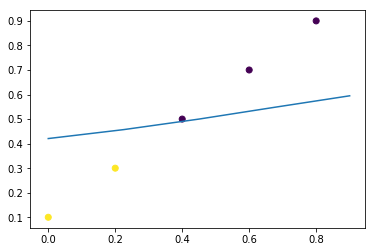

In [17]:
plt.plot(np.linspace(x.min(),x.max(), len(x)), sigmoid(decision(x, np.array(w))).max(axis=1))
plt.scatter(x[:,0],x[:,1], c=p)
plt.show()

##### ¿Podemos evaluar la performance de nuestro modelo utilizando técnicas de validación cruzada?

    Por supuesto que si, el indicador de que el modelo es válido será el incremento de la media harmónica de los datos de prueba. Si la media harmónica de los datos de prueba es mayor que la media harmónica de los datos de entrenamiento, simplemente hemos escogido los datos adecuados para testear la performance de nuestro y confirmar que podemos entrenar nueva información y clasificarla con éxito.
    Ahora vamos a proceder a realizar regresión logística utilizando técnicas de validación cruzada, es decir, separando los datos entre datos de prueba y datos de entrenamiento.

In [19]:
generos = ['Rock', 'Pop', 'Metal', 'samba', 'Rap', 'Electronic', 'experimental', 'Punk', 'Latin', 'Folk', 'Reggae', 'Jazz', 'Blues', 'cumbia', 'flamenco', 'Native']

x = np.array([[  1.09258964e-02,   8.60257234e-01,   8.96178667e-03,
          8.72081420e-03,   3.64535217e-01,   1.48036777e-10,
          4.08074693e-02,   9.98116112e-01,   3.63949846e-04,
          2.05294845e-04,   1.00000000e+00,   1.28593041e-01,
          5.99088745e-05,   2.61188684e-01,   6.22195801e-02,
          1.23675181e-01,   1.29367099e-01],[  1.69338725e-01,   9.10753840e-01,   1.19009463e-02,
          4.49740413e-03,   3.03334838e-01,   1.43074691e-10,
          3.38605597e-02,   9.97445355e-01,   2.28736281e-04,
          1.29496695e-04,   1.00000000e+00,   4.68986384e-02,
          1.06256292e-04,   1.77439434e-01,   3.97978387e-02,
          4.28252054e-02,   8.47287444e-02],[  4.47067311e-02,   9.51426995e-01,   1.80222583e-02,
          5.28139196e-03,   3.05344847e-01,   1.31023886e-10,
          2.96770093e-02,   9.97319350e-01,   8.54099019e-04,
          2.99017734e-04,   1.00000000e+00,   4.61422088e-02,
          0.00000000e+00,   2.41427656e-01,   2.46286094e-02,
          4.37631256e-02,   1.37814072e-01],[  2.30459551e-01,   9.74902244e-01,   1.45833199e-02,
          8.61397423e-03,   3.62781358e-01,   1.50155971e-10,
          3.54352739e-02,   9.98550199e-01,   5.37473921e-04,
          7.59923484e-05,   1.00000000e+00,   8.09379728e-02,
          2.13669499e-05,   9.56334436e-02,   3.67172294e-02,
          8.01435681e-02,   6.57713925e-02],[  2.40091128e-01,   8.22608212e-01,   1.76171775e-02,
          1.14641393e-02,   3.36865627e-01,   1.55087221e-10,
          9.34424920e-02,   9.98822186e-01,   7.94379695e-04,
          2.92804956e-04,   1.00000000e+00,   3.10136157e-02,
          2.65540567e-04,   2.38821972e-01,   1.41763265e-02,
          3.01164651e-02,   1.89523759e-01],[  1.52750386e-01,   8.01787664e-01,   2.32454876e-02,
          1.50282330e-02,   3.52860771e-01,   1.61660157e-10,
          1.90220332e-01,   9.99321360e-01,   5.63389854e-04,
          1.01576181e-03,   1.00000000e+00,   7.41301059e-02,
          2.85384964e-04,   1.33614998e-01,   4.52053293e-02,
          7.18133452e-02,   1.34714558e-01],[  4.47145156e-02,   8.64396811e-01,   1.69509181e-02,
          1.35464114e-02,   3.30839837e-01,   1.55868707e-10,
          1.06418814e-01,   9.98979861e-01,   7.57195964e-04,
          5.60079635e-04,   1.00000000e+00,   4.46293495e-02,
          1.77890535e-04,   1.97852598e-01,   1.67189834e-02,
          4.30150360e-02,   8.34109463e-02],[  1.32748419e-01,   7.61699689e-01,   4.27915815e-03,
          1.07530195e-02,   3.80719474e-01,   1.43605849e-10,
          1.27940815e-01,   9.98170068e-01,   1.05917293e-04,
          1.37760994e-04,   1.00000000e+00,   9.22844175e-02,
          2.99053452e-04,   1.14038451e-01,   4.52682926e-02,
          8.51482604e-02,   5.96516206e-02],[  8.20647113e-01,   8.24928368e-01,   4.10156612e-03,
          1.12425039e-02,   3.69898192e-01,   1.39170481e-10,
          3.81485229e-02,   9.98052442e-01,   7.79731559e-04,
          2.39541705e-04,   1.00000000e+00,   1.11195159e-01,
          9.57592928e-05,   1.85418931e-01,   5.37516856e-02,
          1.06449365e-01,   1.91842623e-01],[  2.17166576e-01,   8.03975363e-01,   6.56389117e-03,
          1.30142635e-02,   3.60438900e-01,   1.51505281e-10,
          7.16483314e-02,   9.98430879e-01,   4.43951205e-04,
          4.34982748e-04,   1.00000000e+00,   4.08472012e-02,
          4.36737812e-04,   3.56647976e-01,   2.08367958e-02,
          3.78641922e-02,   1.02139419e-01],[  8.91631361e-02,   8.69112357e-01,   1.21949681e-02,
          1.00979790e-02,   2.49194807e-01,   1.84568916e-10,
          2.21650473e-01,   9.99462556e-01,   5.80291550e-04,
          2.25254058e-03,   1.00000000e+00,   8.85022693e-02,
          2.48695997e-04,   2.07830135e-01,   1.84441123e-02,
          8.42428049e-02,   7.52578022e-02],[  1.20162216e-01,   7.61218207e-01,   2.99195345e-03,
          1.50939418e-02,   3.80688736e-01,   1.59282171e-10,
          1.67192559e-01,   9.98815714e-01,   8.02267153e-04,
          4.41596992e-04,   1.00000000e+00,   9.37972769e-02,
          4.20464223e-04,   2.22518241e-01,   4.96743258e-02,
          8.86308238e-02,   1.00000000e+00],[  2.55030264e-01,   9.29181465e-01,   1.23512334e-02,
          1.01289667e-02,   3.43601771e-01,   1.41329226e-10,
          4.93890331e-02,   9.98022581e-01,   3.21132217e-04,
          3.90023863e-04,   1.00000000e+00,   1.17246596e-01,
          1.02735817e-04,   1.94157797e-01,   5.29511242e-02,
          1.05056626e-01,   1.77442206e-01],[  4.30551612e-02,   8.17521556e-01,   2.16374323e-02,
          9.95812881e-03,   3.70219454e-01,   1.59480540e-10,
          6.06643761e-02,   9.99065933e-01,   7.29026472e-04,
          7.50659384e-04,   1.00000000e+00,   9.68229955e-02,
          1.25960880e-04,   8.20773022e-02,   6.00626195e-02,
          9.09543735e-02,   9.04358343e-02],[  5.19102906e-01,   8.81992323e-01,   8.69451998e-03,
          1.25907848e-02,   3.60681206e-01,   1.43445977e-10,
          5.61514294e-02,   9.98331578e-01,   3.40287472e-04,
          2.84361928e-04,   1.00000000e+00,   1.19515885e-01,
          2.30726107e-04,   2.46701640e-01,   7.29839160e-02,
          1.19012194e-01,   8.95434505e-02],[  2.95870712e-05,   8.54112253e-01,   2.73923158e-02,
          6.48071660e-03,   3.42531100e-01,   1.76319959e-10,
          6.77335810e-02,   9.98480541e-01,   2.98596623e-04,
          1.73472176e-04,   1.00000000e+00,   2.19364599e-02,
          5.50912979e-05,   9.36306945e-02,   1.03864129e-02,
          2.07847109e-02,   8.38650439e-02],[  4.88151288e-02,   8.40459411e-01,   3.31422168e-03,
          1.48980750e-02,   3.30034549e-01,   1.29757455e-10,
          1.56813859e-01,   9.98665922e-01,   3.58315947e-04,
          6.83748509e-04,   1.00000000e+00,   4.46293495e-02,
          7.87668984e-04,   8.97774085e-02,   1.61614177e-02,
          4.07424300e-02,   1.91742098e-01],[  2.22545299e-01,   8.46042199e-01,   2.70683979e-02,
          1.21687324e-02,   3.22138318e-01,   1.64010805e-10,
          1.01189874e-01,   9.98804677e-01,   6.16348501e-04,
          5.13624411e-04,   1.00000000e+00,   8.39636914e-02,
          3.79672823e-04,   4.99884760e-02,   2.29414514e-02,
          8.20474949e-02,   7.93932005e-02],[  5.99342758e-03,   1.45208845e-10,   7.44097953e-01,
          1.00000000e+00,   9.99076184e-01,   9.49641704e-01,
          1.26770897e-06,   3.47988621e-01,   1.00000000e+00,
          3.41091727e-02,   1.04400986e-03,   5.55521936e-02,
          8.29988803e-02,   4.45635754e-01,   4.49664321e-02,
          6.70475001e-03,   3.70356690e-04],[  1.34118749e-02,   1.66892389e-10,   7.43508262e-01,
          1.00000000e+00,   9.99653116e-01,   8.86365637e-01,
          1.28038606e-04,   3.93283285e-01,   1.13348214e-02,
          1.00000000e+00,   6.34852267e-03,   3.42511346e-02,
          1.77014331e-01,   1.38278111e-01,   2.62170389e-02,
          2.27616760e-01,   5.42804693e-03],[  1.46056360e-02,   1.61961888e-10,   7.62264471e-01,
          1.00000000e+00,   1.00000000e+00,   9.51615535e-01,
          2.53541793e-06,   1.98501203e-01,   7.05731255e-01,
          4.26518144e-02,   6.37489583e-03,   7.38275340e-02,
          5.76208763e-01,   5.66765423e-01,   1.23991879e-01,
          9.75184100e-03,   4.96632331e-04],[  1.20458361e-02,   1.83868587e-10,   1.00000000e+00,
          1.00000000e+00,   9.99163609e-01,   7.39360870e-01,
          4.22569656e-07,   2.66634704e-01,   2.84216526e-01,
          2.60891090e-02,   1.21186614e-02,   8.48411498e-02,
          1.00000000e+00,   0.00000000e+00,   2.62781460e-01,
          5.09586042e-03,   7.15561742e-06],[  1.08562531e-02,   4.75640638e-11,   8.95900362e-01,
          1.00000000e+00,   9.98854417e-01,   7.06534392e-01,
          5.49340552e-06,   1.48967003e-01,   2.03052358e-03,
          6.63851430e-02,   1.09471691e-02,   6.28139183e-02,
          3.14056843e-01,   3.41925078e-01,   9.08681385e-01,
          1.30413365e-02,   9.64357055e-04],[  1.35601142e-02,   1.74980919e-10,   8.45245930e-01,
          1.00000000e+00,   9.99227212e-01,   6.96956229e-01,
          1.26770897e-06,   2.86001022e-01,   1.91615707e-01,
          3.45196979e-02,   1.41028994e-02,   6.20877458e-02,
          7.99461596e-01,   1.93428789e-01,   2.47243272e-01,
          8.38032510e-03,   2.21108578e-04],[  1.21397504e-02,   0.00000000e+00,   9.12193964e-01,
          1.00000000e+00,   9.98809577e-01,   7.57187890e-01,
          0.00000000e+00,   0.00000000e+00,   3.30136791e-06,
          2.49085351e-02,   8.03437886e-03,   7.96369138e-02,
          1.82736696e-01,   3.20405016e-01,   1.00000000e+00,
          5.38237960e-03,   2.20080334e-04],[  1.11018846e-02,   1.38159706e-10,   8.29297646e-01,
          1.00000000e+00,   9.99081668e-01,   7.41318052e-01,
          7.18368415e-06,   2.54921211e-01,   2.13954836e-02,
          7.91991055e-02,   1.07506300e-02,   8.24205749e-02,
          3.93418016e-01,   1.00000000e+00,   6.64634531e-01,
          1.73518608e-02,   9.40157701e-04],[  2.67062914e-03,   1.30479960e-10,   7.56156030e-01,
          1.00000000e+00,   9.99205082e-01,   1.00000000e+00,
          1.64802166e-05,   2.85642859e-01,   6.53428755e-02,
          1.50737008e-01,   0.00000000e+00,   8.20574887e-02,
          6.24405062e-02,   3.06216437e-01,   8.11487534e-03,
          3.33527885e-02,   1.78697545e-03],[  8.32190902e-03,   1.54603552e-10,   7.36428023e-01,
          1.00000000e+00,   9.99226296e-01,   9.67141366e-01,
          4.22569656e-07,   3.62507785e-01,   1.10245389e-01,
          2.83213710e-02,   1.31815217e-03,   6.00302572e-02,
          6.94242685e-02,   1.94803602e-01,   1.47472421e-02,
          4.34679986e-03,   3.05519308e-04],[  1.36162843e-02,   1.62074132e-10,   7.44735464e-01,
          1.00000000e+00,   9.99155274e-01,   8.58239316e-01,
          5.11309283e-05,   3.85450295e-01,   2.26827449e-02,
          4.12525686e-01,   1.08660088e-02,   5.88199697e-02,
          1.73222275e-01,   2.57972390e-01,   3.89717186e-02,
          9.50355466e-02,   5.70302708e-03],[  4.79464763e-01,   8.87442623e-01,   1.04082660e-02,
          1.45400960e-02,   3.61393735e-01,   1.35042755e-10,
          1.42589170e-01,   9.98591830e-01,   5.16065107e-04,
          5.67119347e-04,   1.00000000e+00,   1.31618759e-01,
          3.69026804e-04,   2.47917658e-01,   4.29888217e-02,
          1.24210231e-01,   1.10834121e-01],[  1.08190216e-01,   1.00000000e+00,   1.69530960e-02,
          9.98875974e-03,   3.20264510e-01,   1.43172085e-10,
          3.69154816e-02,   9.98577997e-01,   7.63956643e-04,
          1.35227320e-04,   1.00000000e+00,   5.90015129e-02,
          4.95097002e-05,   9.13489375e-02,   2.63790432e-02,
          5.45888138e-02,   1.00340052e-01],[  2.86757223e-01,   8.96420594e-01,   1.98021681e-02,
          1.26005582e-02,   3.42286675e-01,   1.30423922e-10,
          7.21503169e-02,   9.98642020e-01,   5.36347141e-04,
          1.85724401e-04,   1.00000000e+00,   4.68986384e-02,
          3.75829905e-04,   1.64499665e-01,   1.51339186e-02,
          4.38165296e-02,   1.14495013e-01],[  1.09248000e-02,   1.41323286e-10,   7.60988771e-01,
          1.00000000e+00,   9.99770824e-01,   9.26477233e-01,
          2.61993187e-05,   3.36255519e-01,   1.56592306e-01,
          2.21927950e-01,   4.72801112e-03,   7.67322239e-02,
          3.41673873e-01,   1.93217065e-01,   4.78917125e-02,
          5.43358414e-02,   2.48327184e-03],[  9.71571932e-03,   1.53423385e-10,   7.47506697e-01,
          1.00000000e+00,   9.99209201e-01,   8.81656482e-01,
          2.87347366e-05,   3.91741241e-01,   1.53912084e-01,
          2.41226903e-01,   9.19757359e-03,   7.38275340e-02,
          1.69407143e-01,   1.00769736e-01,   2.56374181e-02,
          5.24267910e-02,   4.05636618e-03],[  5.98130401e-02,   9.61093600e-01,   4.41423784e-03,
          1.02802949e-02,   3.54971004e-01,   1.34839473e-10,
          4.04226314e-02,   9.98169482e-01,   4.93529513e-04,
          1.14179469e-04,   1.00000000e+00,   2.57186082e-02,
          1.09074966e-04,   1.47558953e-01,   8.41553279e-03,
          2.35866540e-02,   2.03022288e-01],[  7.89248206e-03,   1.49754764e-10,   8.33755134e-01,
          1.00000000e+00,   9.99169225e-01,   8.20836171e-01,
          3.21152938e-05,   3.88389016e-01,   6.13997108e-02,
          2.68311263e-01,   1.01987901e-02,   2.68683812e-02,
          2.25409215e-01,   2.57914876e-01,   4.88828429e-02,
          5.96672585e-02,   3.51680096e-03],[  2.13894332e-01,   8.31589798e-01,   1.72424274e-02,
          1.12005637e-02,   3.66713784e-01,   1.51865159e-10,
          6.42672211e-02,   9.98887362e-01,   2.11834585e-04,
          2.17611984e-04,   1.00000000e+00,   7.63993949e-02,
          1.77530136e-04,   1.52530423e-01,   2.10667917e-02,
          7.42488907e-02,   1.05110211e-01],[  0.00000000e+00,   9.17959389e-01,   2.33554960e-02,
          1.20312930e-02,   3.21918827e-01,   1.32687028e-10,
          9.93655430e-02,   9.98668818e-01,   3.89865779e-04,
          9.29196959e-04,   1.00000000e+00,   1.00000000e+00,
          3.84440579e-04,   2.11268067e-01,   5.50042665e-01,
          1.00000000e+00,   6.74487253e-02],[  0.00000000e+00,   9.42225096e-01,   1.82104559e-02,
          1.15023096e-02,   3.30026300e-01,   1.33322298e-10,
          7.56739517e-02,   9.98284796e-01,   0.00000000e+00,
          7.83802860e-04,   1.00000000e+00,   9.56127080e-01,
          2.29119784e-04,   1.82837664e-01,   4.94300502e-01,
          9.27508638e-01,   1.50060122e-01],[  0.00000000e+00,   8.33112728e-01,   1.11736931e-02,
          1.41612560e-02,   3.21438979e-01,   1.07753140e-10,
          2.85874038e-01,   9.98348476e-01,   0.00000000e+00,
          8.32291673e-04,   1.00000000e+00,   5.96066566e-01,
          9.99511309e-04,   2.10863509e-01,   1.80404609e-01,
          5.79271945e-01,   7.28891693e-02],[  1.38258112e-02,   8.70217438e-01,   2.48767298e-02,
          1.33693177e-02,   3.07266443e-01,   1.48479062e-10,
          1.34483332e-01,   9.98937545e-01,   4.32683408e-04,
          4.27007898e-04,   1.00000000e+00,   5.29500756e-03,
          6.33294590e-04,   3.63250139e-01,   2.54158399e-03,
          4.44798627e-03,   7.40428549e-02],[  5.86180351e-02,   7.62235148e-01,   1.29540951e-02,
          0.00000000e+00,   3.24730921e-01,   1.75591208e-10,
          3.30631961e-02,   9.97441048e-01,   8.04520712e-04,
          2.74969594e-06,   1.00000000e+00,   3.63086233e-02,
          1.83582664e-05,   5.39565211e-01,   1.60442969e-02,
          3.53840939e-02,   1.50224070e-01],[  5.03800249e-04,   9.36585901e-01,   5.33029981e-02,
          5.04424642e-03,   1.81710067e-01,   1.70017000e-10,
          1.15234509e-01,   9.99968299e-01,   5.20572226e-04,
          1.60795067e-03,   1.00000000e+00,   3.02571861e-03,
          1.64937357e-04,   4.47394572e-01,   1.16960014e-03,
          1.75811401e-03,   0.00000000e+00],[  2.30507770e-01,   7.47549158e-01,   1.26095915e-02,
          1.42361493e-02,   3.82914241e-01,   1.67543812e-10,
          1.51385767e-01,   9.98917508e-01,   5.39727481e-04,
          8.84624914e-04,   1.00000000e+00,   6.27836611e-02,
          2.90321694e-04,   2.82009996e-01,   3.09243398e-02,
          6.25830142e-02,   1.08402540e-01],[  9.21527945e-04,   8.68476668e-01,   3.24882405e-02,
          7.65189402e-03,   2.95633094e-01,   1.55345958e-10,
          1.60135357e-01,   9.99963289e-01,   4.37190527e-04,
          3.36893998e-03,   1.00000000e+00,   3.02571861e-03,
          4.42121432e-04,   5.33466853e-01,   1.14675241e-03,
          2.50202156e-03,   1.10202279e-02],[  9.31307954e-02,   7.22735586e-01,   3.22230756e-03,
          5.34110928e-03,   3.79567051e-01,   1.67582809e-10,
          3.28122795e-02,   9.98103653e-01,   5.13811547e-04,
          3.04941855e-05,   1.00000000e+00,   4.53857791e-03,
          3.77202183e-05,   3.80093834e-01,   1.74901012e-03,
          2.29461282e-03,   9.19904871e-02],[  1.77877622e-02,   7.68065889e-01,   1.07752034e-02,
          8.71057887e-03,   1.31034421e-01,   0.00000000e+00,
          8.91795604e-01,   9.97891012e-01,   6.32123417e-04,
          3.26263825e-03,   1.00000000e+00,   2.26928896e-03,
          3.02989198e-03,   4.13647899e-01,   1.29140620e-03,
          2.00686395e-03,   0.00000000e+00],[  2.43781811e-02,   7.70769267e-01,   3.83116415e-02,
          1.28777939e-02,   3.03208914e-01,   1.93457111e-10,
          1.67068230e-01,   9.99708370e-01,   7.29026472e-04,
          9.42176967e-04,   1.00000000e+00,   4.68986384e-02,
          2.49134906e-04,   1.01678439e-01,   1.91828643e-02,
          4.59582849e-02,   1.08879133e-01],[  6.87603334e-02,   9.38280489e-01,   9.16572090e-03,
          6.64662243e-03,   2.88203326e-01,   1.37834605e-10,
          5.15975828e-02,   9.97395144e-01,   1.38593904e-04,
          9.70423240e-04,   1.00000000e+00,   1.51285930e-03,
          5.23708297e-05,   7.00373130e-01,   6.21691154e-04,
          6.93548571e-04,   0.00000000e+00],[  2.21450736e-01,   9.68730909e-01,   1.65161460e-02,
          3.04957973e-04,   0.00000000e+00,   2.76626222e-11,
          1.00000000e+00,   9.96962618e-01,   5.40854260e-04,
          3.94679938e-03,   1.00000000e+00,   3.02571861e-03,
          2.19438250e-03,   6.70323820e-01,   1.12592958e-03,
          1.76654621e-03,   0.00000000e+00],[  1.79730367e-01,   9.59410222e-01,   6.33321323e-02,
          1.16774908e-02,   3.19848328e-01,   1.67681868e-10,
          9.70324308e-02,   9.99521309e-01,   3.36907133e-04,
          3.91809473e-04,   1.00000000e+00,   3.02571861e-03,
          2.59252821e-04,   1.44999387e-01,   0.00000000e+00,
          1.81713942e-03,   0.00000000e+00],[  1.05545957e-02,   8.07143807e-01,   5.54220379e-03,
          1.41812678e-02,   3.58095929e-01,   1.45162382e-10,
          1.60050913e-01,   9.98422752e-01,   6.10714602e-04,
          2.84099112e-04,   1.00000000e+00,   6.95915280e-02,
          6.12079950e-04,   2.47256505e-01,   2.88872947e-02,
          6.80721895e-02,   1.12055323e-01],[  2.35477174e-01,   8.98196257e-01,   1.50569234e-02,
          1.32620144e-02,   3.65860832e-01,   1.46578416e-10,
          1.33464712e-01,   9.98630551e-01,   6.70433927e-04,
          2.74523984e-04,   1.00000000e+00,   8.01815431e-02,
          1.37572993e-04,   1.00280030e-01,   3.69079644e-02,
          7.74159677e-02,   1.43236336e-01],[  1.73353057e-01,   8.91465240e-01,   2.06763190e-02,
          1.21465343e-02,   3.61918365e-01,   1.37021200e-10,
          1.32045087e-01,   9.98509584e-01,   1.29579667e-04,
          2.63213723e-04,   1.00000000e+00,   4.99243570e-02,
          2.05876285e-04,   7.42764742e-02,   2.41898672e-02,
          4.66509651e-02,   1.79750581e-01],[  4.58110280e-02,   8.20318984e-01,   1.22539054e-02,
          1.70262167e-02,   3.37660670e-01,   1.54370350e-10,
          2.89347337e-01,   9.99329655e-01,   3.89865779e-04,
          7.03691546e-04,   1.00000000e+00,   4.46293495e-02,
          2.76035347e-04,   1.31398473e-01,   1.39216907e-02,
          4.32686041e-02,   1.35578395e-01],[  2.17091182e-01,   9.17167509e-01,   1.88676369e-02,
          1.37584231e-02,   3.51462622e-01,   1.43569406e-10,
          1.12291590e-01,   9.99277760e-01,   6.18602060e-04,
          1.19126969e-03,   1.00000000e+00,   2.64750378e-02,
          3.86144668e-04,   2.75490645e-01,   1.31518437e-02,
          2.41060743e-02,   2.75835407e-01],[  1.19313287e-01,   9.17375217e-01,   2.86576781e-02,
          1.00601118e-02,   3.40621054e-01,   1.42261730e-10,
          7.26299923e-02,   9.98315963e-01,   3.88739000e-04,
          1.74287515e-04,   1.00000000e+00,   5.82450832e-02,
          9.09776036e-05,   1.10155102e-01,   4.36996809e-02,
          5.25396629e-02,   9.50827439e-02],[  7.66725191e-02,   9.01772907e-01,   3.91270196e-02,
          1.13833172e-02,   3.32231645e-01,   1.46887308e-10,
          9.87254017e-02,   9.98297991e-01,   4.70993918e-04,
          6.00048174e-04,   1.00000000e+00,   6.80786687e-02,
          3.92765396e-04,   1.76549619e-01,   3.57383376e-02,
          6.52570688e-02,   7.11197606e-02],[  4.24591829e-02,   7.86013058e-01,   5.38141111e-03,
          1.55564418e-02,   3.35969061e-01,   1.32155897e-10,
          1.59212126e-01,   9.98683313e-01,   5.26206124e-04,
          6.45499382e-04,   1.00000000e+00,   4.31164902e-02,
          7.85901552e-04,   8.91299332e-02,   1.86664515e-02,
          3.95332912e-02,   1.83121220e-01],[  2.70152290e-01,   6.42825469e-01,   0.00000000e+00,
          1.83573386e-02,   3.41925925e-01,   1.71894943e-10,
          3.84735685e-01,   9.99250346e-01,   7.65083422e-04,
          8.49769169e-04,   1.00000000e+00,   6.27836611e-02,
          2.86996133e-04,   4.02156220e-02,   5.76286744e-05,
          6.16222922e-02,   8.11199017e-02],[  3.32042344e-02,   9.82275305e-01,   2.17358061e-02,
          9.77781428e-03,   3.35499694e-01,   1.44878165e-10,
          4.52793833e-02,   9.98467821e-01,   4.65360020e-04,
          5.93778201e-05,   1.00000000e+00,   1.04387292e-01,
          7.55028448e-05,   8.28659677e-02,   4.43833389e-02,
          1.01820202e-01,   6.35999309e-02],[  1.45199734e-02,   2.34174791e-10,   8.16635428e-01,
          1.00000000e+00,   9.99623435e-01,   7.93624853e-01,
          2.23961918e-05,   2.37515910e-01,   2.94250668e-01,
          1.93949178e-01,   8.50458232e-03,   8.47201210e-02,
          6.12990668e-01,   9.51644120e-04,   1.42645820e-01,
          4.37632710e-02,   2.30802736e-03],[  1.45199734e-02,   2.34174791e-10,   8.16635428e-01,
          1.00000000e+00,   9.99623435e-01,   7.93624853e-01,
          2.23961918e-05,   2.37515910e-01,   2.94250668e-01,
          1.93949178e-01,   8.50458232e-03,   8.47201210e-02,
          6.12990668e-01,   9.51644120e-04,   1.42645820e-01,
          4.37632710e-02,   2.30802736e-03],[  1.05427703e-02,   1.60934044e-10,   7.47788681e-01,
          1.00000000e+00,   9.98978142e-01,   7.37342425e-01,
          4.43698138e-05,   3.94521724e-01,   2.34944224e-02,
          3.61128639e-01,   1.16030175e-02,   5.57942511e-02,
          3.29879128e-01,   2.48636544e-01,   6.20048716e-02,
          7.95908977e-02,   3.44257606e-03],[  1.19332066e-02,   1.53667079e-10,   7.49484900e-01,
          1.00000000e+00,   9.99199123e-01,   8.92153752e-01,
          3.00024456e-05,   3.64344672e-01,   1.89054550e-01,
          2.50979263e-01,   1.01046632e-02,   5.26475038e-02,
          1.84330349e-01,   7.07016502e-02,   3.78585722e-02,
          5.67633204e-02,   2.53219411e-03],[  5.86180351e-02,   7.62235148e-01,   1.29540951e-02,
          0.00000000e+00,   3.24730921e-01,   1.75591208e-10,
          3.30631961e-02,   9.97441048e-01,   8.04520712e-04,
          2.74969594e-06,   1.00000000e+00,   3.63086233e-02,
          1.83582664e-05,   5.39565211e-01,   1.60442969e-02,
          3.53840939e-02,   1.50224070e-01],[  3.35109876e-02,   8.73414283e-01,   1.56122508e-02,
          9.26378787e-03,   3.41338848e-01,   1.46888612e-10,
          3.62140804e-02,   9.98076316e-01,   1.90425771e-04,
          1.60863496e-04,   1.00000000e+00,   6.50529501e-02,
          3.64982654e-05,   1.84039547e-01,   3.23384858e-02,
          5.96738218e-02,   2.06268375e-01],[  1.58519836e-03,   8.87859083e-01,   1.26862897e-02,
          1.17129589e-02,   3.35388742e-01,   1.21192778e-10,
          1.95726095e-01,   9.98110896e-01,   6.99730199e-04,
          5.37898154e-04,   1.00000000e+00,   0.00000000e+00,
          4.32740498e-04,   3.41081305e-01,   2.09558816e-04,
          3.83665167e-04,   0.00000000e+00],[  2.98855738e-02,   7.83347193e-01,   4.85094365e-02,
          8.28423518e-03,   1.96121207e-01,   1.76679948e-10,
          1.07599288e-01,   1.00000000e+00,   5.87052228e-04,
          8.90985775e-05,   1.00000000e+00,   5.67322239e-02,
          1.79759336e-04,   7.74356692e-02,   2.78490569e-02,
          5.28572549e-02,   1.06103679e-01],[  1.77626384e-03,   8.70828890e-01,   9.90608292e-03,
          1.13689788e-02,   3.46832447e-01,   1.53488916e-10,
          5.97352193e-02,   9.97973193e-01,   4.72120698e-04,
          1.59244382e-04,   1.00000000e+00,   8.62329803e-02,
          1.24802723e-03,   1.78197437e-01,   5.57164502e-02,
          8.48260729e-02,   1.87593420e-01],[  2.34218617e-01,   8.67440924e-01,   1.77424475e-03,
          8.93225065e-03,   3.30646627e-01,   1.28834249e-10,
          1.53674302e-01,   9.98084156e-01,   3.44794591e-04,
          7.44162611e-04,   1.00000000e+00,   4.31164902e-02,
          1.75693899e-04,   1.68032865e-01,   1.56475472e-02,
          3.82071481e-02,   1.25762875e-01],[  1.14779495e-01,   7.15417095e-01,   1.57126128e-02,
          1.46907122e-02,   3.35641032e-01,   1.92114241e-10,
          4.29127106e-01,   9.98379695e-01,   6.74941046e-04,
          2.06521819e-03,   1.00000000e+00,   6.50529501e-02,
          1.19953299e-03,   3.41346639e-01,   3.59130325e-02,
          6.44707011e-02,   2.29148084e-01],[  2.23458053e-03,   6.97069399e-01,   4.92822696e-03,
          1.44849365e-02,   3.81415803e-01,   1.88241506e-10,
          7.52688847e-02,   9.98481859e-01,   1.83665093e-04,
          5.27996163e-04,   1.00000000e+00,   0.00000000e+00,
          3.50398197e-04,   3.29483019e-01,   2.30514698e-04,
          0.00000000e+00,   0.00000000e+00],[  2.33641630e-01,   8.31521019e-01,   2.70927946e-02,
          1.35575452e-02,   3.34162096e-01,   1.49458862e-10,
          1.57133240e-01,   9.98461011e-01,   5.25079344e-04,
          1.15496588e-03,   1.00000000e+00,   5.82450832e-02,
          5.39607329e-04,   1.26108550e-01,   2.08615801e-02,
          5.52694267e-02,   8.13513734e-02],[  3.76456752e-02,   7.97962317e-01,   9.31149153e-03,
          1.40233220e-02,   3.30110499e-01,   9.67129155e-11,
          3.13312922e-01,   9.99069302e-01,   5.90432567e-04,
          7.06509656e-04,   1.00000000e+00,   1.13464448e-01,
          5.48919786e-04,   1.02205670e-01,   2.02867902e-02,
          1.08129328e-01,   6.21805221e-02],[  3.62357116e-01,   9.08260440e-01,   4.73796995e-03,
          1.39728562e-02,   3.57692007e-01,   1.28216826e-10,
          6.80540978e-02,   9.98581615e-01,   4.03387136e-04,
          6.06651039e-04,   1.00000000e+00,   1.39183056e-01,
          3.84403134e-04,   1.28330245e-01,   6.51149536e-02,
          1.37123989e-01,   1.25783954e-01],[  5.84856977e-01,   8.18808762e-01,   8.55574028e-03,
          1.43060539e-02,   3.78603778e-01,   1.85014032e-10,
          9.21817670e-02,   9.99034017e-01,   6.86208843e-04,
          1.87565627e-04,   1.00000000e+00,   9.45537065e-02,
          1.74827064e-04,   9.29005123e-02,   4.04937486e-02,
          8.93017893e-02,   1.29300656e-01],[  1.00857108e-01,   7.26337266e-01,   2.98748655e-03,
          1.54245978e-02,   3.85320661e-01,   1.47832524e-10,
          1.49546332e-01,   9.98760599e-01,   4.37190527e-04,
          4.01224940e-04,   1.00000000e+00,   1.00605144e-01,
          3.79953757e-04,   1.48262591e-01,   4.37631348e-02,
          9.35947567e-02,   5.04513749e-02],[  1.79501828e-01,   8.19048509e-01,   8.06492886e-03,
          1.55154691e-02,   3.86532842e-01,   1.49205898e-10,
          8.08314419e-02,   9.98947731e-01,   4.73247478e-04,
          1.24104642e-03,   1.00000000e+00,   7.33736762e-02,
          2.79310260e-04,   1.78549733e-01,   3.10837359e-02,
          6.94829548e-02,   8.11777600e-02],[  1.43131137e-01,   8.13567159e-01,   1.21729915e-02,
          1.27516317e-02,   3.61070029e-01,   1.66356096e-10,
          6.80626913e-02,   9.98701416e-01,   4.58599342e-04,
          8.87879177e-04,   1.00000000e+00,   7.48865356e-02,
          2.09376590e-04,   1.50893079e-01,   2.12035420e-02,
          7.41787922e-02,   1.28700362e-01],[  3.53200438e-01,   9.10011422e-01,   1.50288275e-02,
          1.31131650e-02,   3.48928795e-01,   1.39297157e-10,
          1.00680430e-01,   9.98540448e-01,   5.41981040e-04,
          3.44025737e-04,   1.00000000e+00,   8.16944024e-02,
          5.28915070e-04,   2.02869340e-01,   3.99936167e-02,
          7.96915556e-02,   1.57068004e-01],[  2.69410683e-01,   7.73939640e-01,   1.40962316e-02,
          1.55271096e-02,   3.10432189e-01,   1.52413276e-10,
          3.59585138e-01,   9.98743091e-01,   7.47054947e-04,
          2.85451395e-03,   1.00000000e+00,   9.75794251e-02,
          6.68139648e-04,   1.28161660e-01,   4.18143184e-02,
          9.03509369e-02,   1.47626283e-01],[  7.28096864e-01,   9.23862383e-01,   3.22444220e-02,
          1.17328550e-02,   3.15095140e-01,   1.36355066e-10,
          1.78950848e-01,   9.99061162e-01,   4.25922730e-04,
          2.50243241e-04,   1.00000000e+00,   8.92586989e-02,
          3.06624717e-04,   4.19945424e-02,   4.48335370e-02,
          8.53604745e-02,   7.28939480e-02],[  1.52517291e-01,   8.17699272e-01,   1.24596406e-02,
          1.40074125e-02,   3.33910505e-01,   1.33028116e-10,
          2.92084966e-01,   9.98336028e-01,   7.01983759e-04,
          8.16080055e-04,   1.00000000e+00,   6.05143722e-02,
          6.87920504e-04,   1.74851457e-01,   2.34947673e-02,
          5.64523142e-02,   7.48782803e-02],[  4.25944779e-01,   8.14604491e-01,   1.79609838e-02,
          1.41449136e-02,   3.33271098e-01,   1.51443691e-10,
          1.51445435e-01,   9.98299009e-01,   4.57472562e-04,
          9.68763723e-04,   1.00000000e+00,   1.27080182e-01,
          4.68302318e-04,   1.48678135e-01,   6.13334589e-02,
          1.22879861e-01,   7.87521655e-02],[  4.88151288e-02,   8.40459411e-01,   3.31422168e-03,
          1.48980750e-02,   3.30034549e-01,   1.29757455e-10,
          1.56813859e-01,   9.98665922e-01,   3.58315947e-04,
          6.83748509e-04,   1.00000000e+00,   4.46293495e-02,
          7.87668984e-04,   8.97774085e-02,   1.61614177e-02,
          4.07424300e-02,   1.91742098e-01],[  2.40091128e-01,   8.22608212e-01,   1.76171775e-02,
          1.14641393e-02,   3.36865627e-01,   1.55087221e-10,
          9.34424920e-02,   9.98822186e-01,   7.94379695e-04,
          2.92804956e-04,   1.00000000e+00,   3.10136157e-02,
          2.65540567e-04,   2.38821972e-01,   1.41763265e-02,
          3.01164651e-02,   1.89523759e-01],[  1.40671288e-02,   8.77062627e-01,   1.74342129e-02,
          1.15354022e-02,   3.44388521e-01,   1.35087469e-10,
          1.06522873e-01,   9.97927645e-01,   6.38884095e-04,
          7.66248178e-04,   1.00000000e+00,   6.80786687e-02,
          2.02558106e-04,   2.09327121e-01,   3.78816999e-02,
          6.67393835e-02,   1.51652013e-01],[  2.40091128e-01,   8.22608212e-01,   1.76171775e-02,
          1.14641393e-02,   3.36865627e-01,   1.55087221e-10,
          9.34424920e-02,   9.98822186e-01,   7.94379695e-04,
          2.92804956e-04,   1.00000000e+00,   3.10136157e-02,
          2.65540567e-04,   2.38821972e-01,   1.41763265e-02,
          3.01164651e-02,   1.89523759e-01],[  2.80904333e-02,   9.44979372e-01,   1.20080454e-02,
          1.21700717e-02,   3.57026689e-01,   1.40145534e-10,
          1.14514573e-01,   9.98285609e-01,   4.95783072e-04,
          8.27645169e-04,   1.00000000e+00,   4.31164902e-02,
          3.69213619e-04,   2.11121570e-01,   2.68489173e-02,
          4.10419569e-02,   5.82569091e-02],[  8.33343714e-02,   8.60734701e-01,   1.83451093e-02,
          5.23094898e-03,   3.68032597e-01,   1.68173808e-10,
          3.25095517e-02,   9.98353867e-01,   6.37757315e-04,
          0.00000000e+00,   1.00000000e+00,   4.53857791e-03,
          3.62471794e-05,   1.37701624e-01,   1.18400731e-03,
          4.09383381e-03,   7.17884800e-02],[  5.47709289e-02,   8.81348807e-01,   5.88385376e-03,
          1.28721395e-02,   3.96335201e-01,   1.38523693e-10,
          4.05130298e-02,   9.98696827e-01,   6.32123417e-04,
          1.13211803e-04,   1.00000000e+00,   5.97579425e-02,
          7.43103861e-05,   8.56667172e-02,   2.48569499e-02,
          5.74259020e-02,   1.24667819e-01],[  4.94077870e-01,   7.64775895e-01,   7.06962846e-03,
          1.47619770e-02,   3.44007807e-01,   1.43563328e-10,
          3.25059278e-01,   9.98473115e-01,   6.45644773e-04,
          9.83816289e-04,   1.00000000e+00,   5.74886536e-02,
          6.01400363e-04,   1.78777233e-01,   1.87790894e-02,
          5.64352364e-02,   6.54046127e-02],[  3.69582396e-01,   8.39292565e-01,   1.48819165e-02,
          1.44488567e-02,   3.66454893e-01,   1.48908608e-10,
          1.14255608e-01,   9.99365483e-01,   3.48174930e-04,
          6.99680411e-04,   1.00000000e+00,   6.05143722e-02,
          2.28913481e-04,   1.01752807e-01,   2.37855420e-02,
          5.84517012e-02,   1.16955169e-01],[  1.39088061e-01,   7.67499978e-01,   1.06032061e-02,
          1.49374154e-02,   3.50821157e-01,   1.09669024e-10,
          4.23270445e-01,   9.98564633e-01,   9.12691564e-05,
          7.49947691e-04,   1.00000000e+00,   9.37972769e-02,
          5.77128407e-04,   1.37554091e-01,   3.94378364e-02,
          8.86418130e-02,   1.50516732e-01],[  7.60721292e-02,   7.83619080e-01,   1.36719864e-02,
          1.29019149e-02,   3.53178277e-01,   1.72406894e-10,
          9.03697886e-02,   9.98869165e-01,   5.45361379e-04,
          2.85300789e-04,   1.00000000e+00,   9.15279879e-02,
          4.73336495e-04,   1.34736912e-01,   2.82447863e-02,
          9.42124948e-02,   2.47249157e-01],[  1.42779502e-01,   7.89367276e-01,   1.34501824e-02,
          1.50271894e-02,   3.85675171e-01,   1.64320141e-10,
          1.25856969e-01,   9.98419877e-01,   4.48458324e-04,
          1.22035629e-03,   1.00000000e+00,   6.58093797e-02,
          5.82637782e-04,   1.06381251e-01,   3.92415427e-02,
          6.24773490e-02,   1.45810597e-01],[  2.45967016e-01,   8.89348403e-01,   2.09616044e-02,
          1.47066633e-02,   3.31554197e-01,   1.37167111e-10,
          1.63786201e-01,   9.98794729e-01,   4.43951205e-04,
          7.84235886e-04,   1.00000000e+00,   7.03479576e-02,
          3.14072418e-04,   1.02080670e-01,   4.53409075e-02,
          6.59170152e-02,   1.91892701e-01],[  7.83399219e-02,   8.56397222e-01,   9.56752046e-03,
          1.13252634e-02,   3.40749259e-01,   1.93979860e-10,
          1.09785933e-01,   9.99304283e-01,   3.03103742e-04,
          3.57084224e-04,   1.00000000e+00,   4.08472012e-02,
          2.36650417e-04,   1.48282924e-02,   8.68713745e-03,
          4.11605018e-02,   6.80158033e-02],[  5.90033023e-02,   8.28159001e-01,   2.18106028e-02,
          1.37352971e-02,   3.51399490e-01,   1.43784512e-10,
          2.03741993e-01,   9.98408824e-01,   3.48174930e-04,
          1.01474938e-03,   1.00000000e+00,   3.17700454e-02,
          4.08844027e-04,   1.67211864e-01,   1.88354083e-02,
          2.99487021e-02,   7.77981650e-02],[  5.46228745e-02,   8.11367309e-01,   7.87936474e-03,
          7.85719183e-03,   3.43817920e-01,   1.42962420e-10,
          3.74203448e-02,   9.98320154e-01,   3.30146455e-04,
          1.42987413e-04,   1.00000000e+00,   5.59757943e-02,
          6.13020662e-05,   2.62111982e-01,   2.71273887e-02,
          5.18725611e-02,   7.52165574e-02],[  2.65146394e-01,   6.25678065e-01,   1.29277915e-02,
          1.41347884e-02,   3.58744112e-01,   2.55113319e-10,
          2.77313662e-01,   9.99358561e-01,   7.51562066e-04,
          1.57884555e-03,   1.00000000e+00,   1.05900151e-02,
          4.66313978e-04,   2.35704311e-02,   5.34374981e-04,
          9.87905725e-03,   1.89609830e-01],[  3.43229496e-03,   7.91864139e-01,   1.33463250e-02,
          1.48939261e-02,   3.53144959e-01,   1.60602753e-10,
          1.27693946e-01,   9.99187661e-01,   5.28459683e-04,
          1.77106773e-04,   1.00000000e+00,   7.03479576e-02,
          1.03321471e-03,   1.52390375e-01,   4.65501380e-02,
          6.78250187e-02,   9.18383293e-02],[  1.00000000e+00,   9.62495784e-01,   9.89213015e-03,
          1.50409449e-02,   3.53680609e-01,   1.26423566e-10,
          1.05117121e-01,   9.98260696e-01,   5.10431208e-04,
          5.58346609e-04,   1.00000000e+00,   8.16944024e-02,
          9.04560640e-04,   1.80861511e-01,   2.61917086e-02,
          8.21734025e-02,   1.59435070e-01],[  1.41523384e-01,   7.64762878e-01,   2.25988299e-02,
          1.59262919e-02,   2.99569532e-01,   1.49648766e-10,
          3.84039151e-01,   9.98756920e-01,   7.21139014e-04,
          8.14779457e-04,   1.00000000e+00,   6.80786687e-02,
          4.46828384e-04,   6.39376414e-02,   3.46956054e-02,
          6.88816700e-02,   1.21050449e-01],[  2.12270696e-05,   9.16661335e-01,   3.56560501e-02,
          1.12998041e-02,   3.08322157e-01,   1.34684125e-10,
          1.88020285e-01,   9.98604533e-01,   4.12401373e-04,
          6.22773316e-04,   1.00000000e+00,   3.72919818e-01,
          2.59406566e-04,   1.05902056e-01,   1.86422805e-01,
          3.54754270e-01,   1.51368247e-01],[  3.59450875e-01,   8.31472746e-01,   1.42701688e-02,
          1.46446864e-02,   3.63778108e-01,   1.55104291e-10,
          8.97216228e-02,   9.98994673e-01,   8.52972240e-04,
          2.30943269e-04,   1.00000000e+00,   9.15279879e-02,
          3.74119949e-04,   2.30105135e-01,   5.20646876e-02,
          8.71518820e-02,   1.12465724e-01]])

y = np.array([ 3,  3,  3, 15,  9,  7,  5,  7, 14,  9,  1,  7,  2, 13,  0,  5,  8,
        1, 11, 11, 11, 11,  4, 11,  4,  4, 11, 11, 11,  0, 13, 15, 11, 11,
        3, 11, 15, 13, 13,  1, 12, 12,  3, 11,  3,  3,  3,  3,  3,  3,  3,
        3,  6, 15,  8,  9, 13,  5,  8, 15, 13, 11, 11, 11, 11, 12, 11, 11,
       11, 11, 11, 11, 11, 11,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  3,  9,  5,  5,  3,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0, 13, 13])

n = int(len(x) * 80 / 100)
x_train, x_test = x[:n], x[n:]
y_train, y_test = y[:n], y[n:]

lr = 1/x_train.shape[1]        
w = fit(x_train,np.array(y_train),lr)
p_train = predict(x_train,np.array(w))

p_test = predict(x_test, np.array(w))

print(p_train, p_test)

[ 7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7 13 13 13 13 13 13 13
 13 13 13 13  7  7  7 13 13  7 13  7  7  7  7  7  7  7  7  2  2  2  7  7  7
  7  7  7  7  7  7  7  7  7  2  7 13 13 13 13  7  7 11  7  7  7  7  2  7  7
  7  7  7  7  7  7  7  7  7  7] [7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 2 7 7 7 7 7]


Lo que hemos hecho anteriormente es clasificar los datos d prueba y de entrenamiento utilizando el coeficiente theta obtenido del ajuste con los datos de entrenamiento. Ahora vamos a evaluar la eficacia de nuestro análisis evaluando los porcentajes de entrenamiento y prueba de las medias harmónicas correspondientes. **Si la media harmónica de los datos de prueba es mayor que los datos de entrenamiento quiere decir que al menos hemos utilizado un buen conjunto de datos para reconocer la variable categórica y_i**.

In [23]:
cf = confusion_matrix(y_train, p_train)

TP = np.diag(cf)

FP = cf.sum(axis=0) - TP

FN = cf.sum(axis=1) - TP

TN = cf.sum() - (FP + FN + TP) #verdadero negativo

# reminiscencia (tamaño de verdaderos positivos)
sensibilidad = TP/(TP+FN) * 100
# tamaño de verdaderos negativos
especificidad = TN/(TN+FP) * 100

precision = TP/(TP+FP) * 100

media_harmonica = 2 * ((precision * sensibilidad) / (precision + sensibilidad))

for i,j in enumerate(np.unique(y_train)):
    print("Performance general al entrenar los datos para reconocimiento de ", generos[j], ': ', media_harmonica[i])

cf = confusion_matrix(y_test, p_test)

TP = np.diag(cf)

FP = cf.sum(axis=0) - TP

FN = cf.sum(axis=1) - TP

TN = cf.sum() - (FP + FN + TP) #verdadero negativo

# reminiscencia (tamaño de verdaderos positivos)
sensibilidad = TP/(TP+FN) * 100
# tamaño de verdaderos negativos
especificidad = TN/(TN+FP) * 100

precision = TP/(TP+FP) * 100

media_harmonica = 2 * ((precision * sensibilidad) / (precision + sensibilidad))

for i,j in enumerate(np.unique(y_test)):
    print("Performance general al evaluar el reconocimiento de ", generos[j], ': ', media_harmonica[i])    
    

Performance general al entrenar los datos para reconocimiento de  Rock :  nan
Performance general al entrenar los datos para reconocimiento de  Pop :  nan
Performance general al entrenar los datos para reconocimiento de  Metal :  nan
Performance general al entrenar los datos para reconocimiento de  samba :  nan
Performance general al entrenar los datos para reconocimiento de  Rap :  nan
Performance general al entrenar los datos para reconocimiento de  Electronic :  nan
Performance general al entrenar los datos para reconocimiento de  experimental :  nan
Performance general al entrenar los datos para reconocimiento de  Punk :  9.375
Performance general al entrenar los datos para reconocimiento de  Latin :  nan
Performance general al entrenar los datos para reconocimiento de  Folk :  nan
Performance general al entrenar los datos para reconocimiento de  Jazz :  8.0
Performance general al entrenar los datos para reconocimiento de  Blues :  nan
Performance general al entrenar los datos para

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in true_divide
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:34: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in true_divide


¿Qué nos quieren decir estos resultados, por mas bajos que hayan sido?
**Quieren decirnos que los resultados al evaluar el modelo serán buenos si los resultados de entrenamiento también los fueron, por lo que además los datos de entrenamiento deben proporcionar suficiente información para que la media harmónica también lo sea, lo cual implica mejorar siempre la calidad de la información brindada y (en algunos casos) elegir los rasgos mejor adecuados para resolver la tarea que queramos**.

### Ejercicios

#### 1. Un hospital quiere mejorar la respuesta médica a pacientes con enfermedades riesgosas y para eso quiere un agoritmo que permita clasificar a los pacientes de acuerdo al riesgo de la enfermedad que tienen, de forma tal que sea atendido primero el paciente con mayor probabilidad de morirse que los otros pacientes. Para aplicar en el algoritmo cuentan con una base de datos en csv que contiene información acerca de los pacientes. El propósito con este ejercicio es lograr que mediante regresión logística puedas clasificar a los pacientes de acuerdo al riesgo (riesgo leve, mediano y grave) obteniendo un promedio de media harmónica mayor al 50 por ciento para asegurarle al hospital que los enfermos con alta posibilidad de morirse serán atendidos primero y asi se salvarán más vidas.

### Sugerencia
    
    * Utiliza numpy.mean para calcular el promedio de la media harmónica
    * Para encontrar una buena solución al problema es necesario formular una buena hipótesis, para establecer una buena hipótesis es necesario conocer bien con qué valores contamos en nuestro conjunto de datos en x para así utilizar una matriz de datos que contenga los vectores de datos adecuados a nuestra hipótesis y a la relación que establecemos entre todas las partes para categorizar los datos.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

dataset = pd.read_csv('U.S._Chronic_Disease_Indicators__CDI_.csv')

#Tu código aquí